<img
     img align="left"
     src="src/uni_logo_white.png"
     alt="Universität Bielefeld"
     width="20%"
/>

# Miniproject 10: Meta-Learning with Reptile
#### József Lurvig
*16. Februar 2023*

## Abstract

This project aims to understand and replicate some of the foundings in *A. Nichol, J. Achiam, J. Schulman*'s 2018 paper, namely *On First-Order Meta-Learning Algorithms*. This paper considers meta-learning problems, where there is a distribution of tasks, and we would like to obtain an agent that performs well (i.e., learns quickly) when presented with a previously unseen task sampled from this distribution.\
The problem in such a case is obvious: for every task a different AI needs to be trained and training takes long. We would like to avoid this.

I executed a thorough background research and learned about many technical terms mentioned in the paper. Then I annotated the attached Python script of a one-dimensional sine wave regression, that demonstrates the newly introduced Reptile. [...] TODO

## Background

### Human vs Machine Learning

Machine Learning systems have surpassed humans at many tasks, but they need far more data to reach the same level of performance. Also, neural networks are much more efficient and much faster than humans in a single task, similarily to an industrial robot, that can pick up for example a piston or some other part thousands of times a day and put it into a predefined location with high precision; however they are only good in this single task. Much more precise and much faster than their human counterparts, but nonetheless, in this only task. While humans can do many things, maybe nothing as good as a specialized robot or AI, but everything well enough. This comparison is however not fair, because these algorithms have to start from scratch, humans enter the task with a large amount of prior/background knowledge, encoded in their brains and DNA. Humans don't learn every time from scratch, but they are fine-tuning and recombining a set of pre-existing skills.

*Tenenbaum et al.* **[[5](http://proceedings.mlr.press/v27/salakhutdinov12a/salakhutdinov12a.pdf)]** argue that this can be explained as Bayesian inference. According to this explanation, the key is to make our algorithms more Bayesian. This is however difficult. (should make use of deep neural networks and should be computationally feasible)

Moravec’s paradox is a phenomenon surrounding the abilities of AI-powered tools. It observes that tasks humans find complex are easy to teach AI. Compared to tasks that are really trivial for humans (for example sensorimotor skills that come instinctively to humans) are actually pretty hard and complicated for robots. **[[7](https://www.thinkautomation.com/bots-and-ai/what-is-moravecs-paradox-and-what-does-it-mean-for-modern-ai/)]**

*"generalization gap": the gap between what it was trained to do and the new task.\
You work so hard to make a robot do one particular thing or one class of task, and then people come up to you and ask: okay but what about my other tasks? You can fold a sock or stack a cup, how about doing my dishes?* TODO

### Meta-learning

Meta-learning is a technique to leverage experience from other tasks in the past, and not just learn from the most recent experience on the current task. You may not transfer the exact strategy or policy that the robot takes in one task, but you should be able to learn some general heuristics. It is a way to leverage Moravec's paradox, and learn cumulatively over time.
Meta-learning algorithms seek to directly optimize a fast-learning algorithm.
We have a distribution over tasks, that we can divide up to a training set and a test set. The algorithm gets the trainig set of tasks and produces an agent, that has good average performance on the test set of tasks. The learning duration can be chosen as reenforcement reward, i.e. the quicker the algorithm learns, the more reward it gets.

### Model-agnostic meta-learning (MAML)

Model-Agnostic Meta-Learning (MAML) was introduced in 2017 by Chelsea Finn et al. **[[8](https://proceedings.mlr.press/v70/finn17a.html)]** and is open source. Given a sequence of tasks, the parameters of a given model are trained such that few iterations of gradient descent with few training data from a new task will lead to good generalization performance on that task. MAML can be used to train models on a variety of tasks and then fine-tune them for a specific task. MAML was successfully applied to few-shot image classification benchmarks and to policy-gradient-based reinforcement learning. **[[3](https://en.wikipedia.org/wiki/Meta_learning_(computer_science))]** MAML is therefore a powerful tool for meta-learning that can be used to improve the performance of machine learning models.

Compatible with any model trained with gradient descent and applicable to a variety of different learning problems. The goal of meta-learning is to train a model on a variety of learning tasks, such that it can solve new learning tasks using only a small number of training samples. **[[4](https://arxiv.org/abs/1703.03400)]**

$\underset{\phi}{minimize}𝔼_{\tau}\Big[L_{\tau,B}\big(U_{\tau,A}^{k}(\phi)\big)\Big]$

## Reptile

Reptile is a new first-order gradient-based meta-learning algorithm, that was introduced in **[[1](https://arxiv.org/abs/1803.02999)]**.

$\underset{\phi}{minimize}𝔼_{\tau}\Big[L_{\tau}\big(U_{\tau}^{k}(\phi)\big)\Big]$

#### Reptile algorithm *(serial version)*
> *Initialize $\phi$*                    *initial parameter vector*\
> **for** *i* **do**
> > *Sample $\tau$*                 *$\tau$ : task, $L_{\tau}$ : loss, $\tilde{\phi}$ weight vectors*\
> > *Compute $\tilde{\phi}$*              *$\tilde{\phi} = U_{\tau}^{k}(\phi)$, denoting $k$ steps of SGD or Adam*\
> > *Update $\phi$*                 *$\phi \leftarrow \phi + \epsilon (\tilde{\phi} - \phi)$*
> >
> **end**\
> *Return $\phi$* 

#### Reptile algorithm *(batched version)*
> *Initialize $\phi$*                                                      *vector of initial parameters of the model*\
> *Sample $\tau_{1}, \tau_{2}, \dots, \tau_{n}$*                                 *subset of tasks*\
> **for** $i \leftarrow 1$ **to** $n_{epochs}$ **do**
> > **for** $j \leftarrow 1$ **to** $batch\_size$ **do**
> > > *$W \leftarrow SGD(L_{\tau_{i}}, \phi, k)$*                    *$k$ : number of SGD steps*
> > >
> > **end**\
> > *Update $\phi$*                                                  *$\phi \leftarrow \phi + \frac{\epsilon}{k}\sum_{i=1}^n (W_i - \phi)$*
> >
> **end**\
> *Return $\phi$*

## Case Study: One-Dimensional Sine Wave Regression

In the followings, let's look at the task of a 1D sine wave regression.

1. $f(x) = a\cdot{\sin(x+b)}$, where amplitude $a \sim U([0.1, 5])$ and phase $b \sim U([0, 2\pi])$
1. Sample $x_{1}, x_{2}, \dots, x_{p}$
1. Learner sees $(x_{1}, y_{1}), (x_{2}, y_{2}), \dots, (x_{p}, y_{p})$ and predicts $f(x)$
1. Loss is $L_{\tau}(f) = \int_{-5}^{5}dx||f(x)-f_{\tau}(x)||^{2}$

Note that $\mathbb{E}_{\tau}[f_{\tau}()x]=0$ due to the random phase $b$

### Demonstration of MAML and Reptile on a "toy" problem

- few-shot regression
- training on 10 sampled points of random sine wave
- 32 gradient steps
- MLP with layers $1 \to 64 \to 64 \to 1$

| <img src="src/sine_bef.png" width="320"/> | <img src="src/sine_maml.png" width="320"/> | <img src="src/sine_reptile.png" width="320"/> |
| :----: | :----: | :----: |
| After vanilla learning | After MAML training | After Reptile training |

In [ ]:
from torch import nn

model = nn.Sequential(
    nn.Linear(1, 64),
    nn.Tanh(),
    nn.Linear(64, 64),
    nn.Tanh(),
    nn.Linear(64, 1),
)

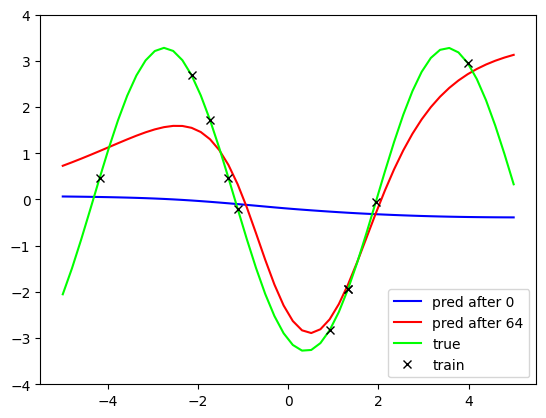

-----------------------------
iteration               1
loss on plotted curve   1.209


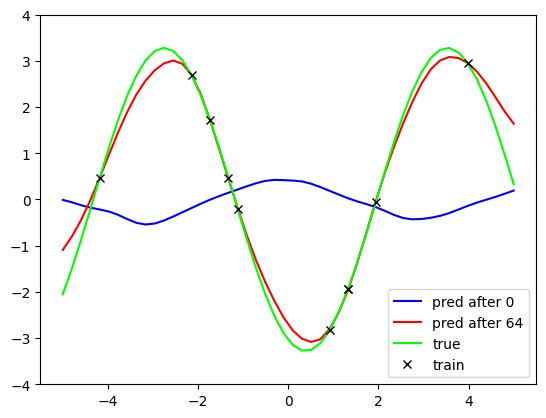

-----------------------------
iteration               10000
loss on plotted curve   0.130


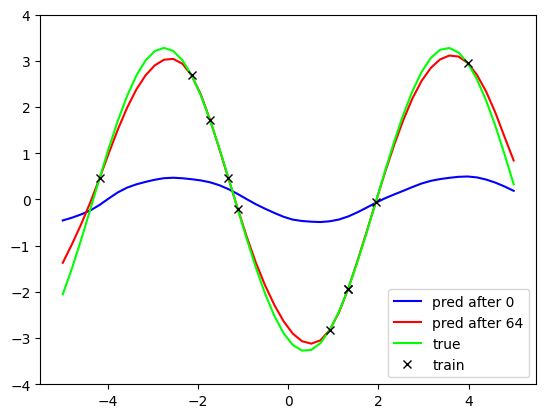

-----------------------------
iteration               20000
loss on plotted curve   0.048


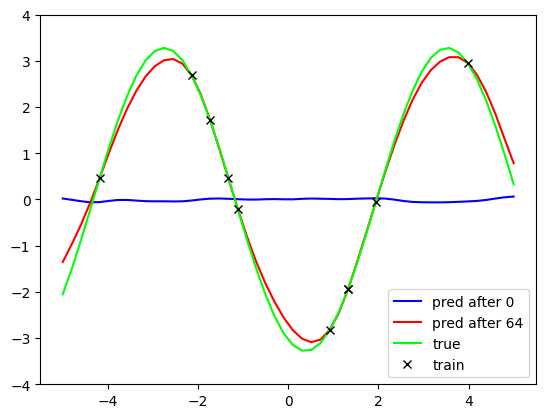

-----------------------------
iteration               30000
loss on plotted curve   0.054


In [5]:
%run reptile-sinewaves-demo.py

| Architecture | Gradient steps | Samples | After 30000 iteration | loss |
| :-: | :-: | :-: | :-: | :-: |
| 1x64x64x1 | 32 | 10 | <img src="src/output-1.png" width="400"/> | 0.016 |
| <span style="color: orange;">1x64x64x64x1</span> | 32 | 10 | <img src="src/output-4.png" width="400"/> | 0.063 |
| 1x64x64x1 | <span style="color: orange;">64</span> | 10 | <img src="src/output-5.png" width="400"/> | 0.054 |
| 1x64x64x1 | 32 | <span style="color: orange;">20</span> | <img src="src/output-6.png" width="400"/> | 0.017 |

Architecture: 1x64x64x1\
Gradient steps: 64\
Samples: 10

<img src="src/output-7.png" width="600"/>\
<img src="src/output-8.png" width="600"/>\
<img src="src/output-9.png" width="600"/>\
<img src="src/output-10.png" width="600"/>\

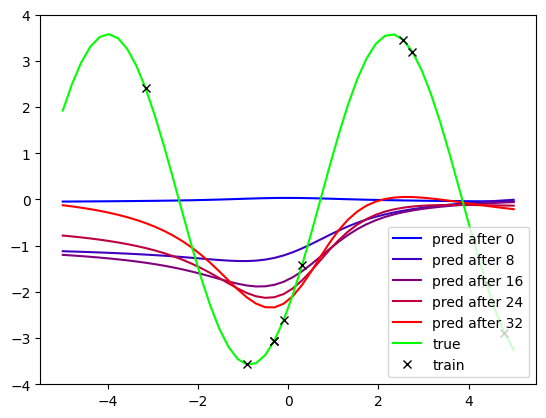

In [7]:
%run vanilla-sinewave.py

## Case Study: FK regression

replace the sine function by the forward kinematics of a two-link robot arm:
- segment lengths $A ∈ [1, 2]$ and $B ∈ [0.5, 1]$
- joint angles $x_{1}, x_{2} ∈ [−{π\over2}, {π\over2}]$
- end effector coordinates $(y_{1}, y_{2})$ (and no phase)

$y_{1} = A\cdot{\cos(x_{1})} + B\cdot{\cos(x_{1}+x_{2})}$\
$y_{2} = A\cdot{\sin(x_{1})} + B\cdot{\sin(x_{1}+x_{2})}$

Configuration space:

<img src="src/fk-demo-config-space.png" width="50%"/>

-------------------------


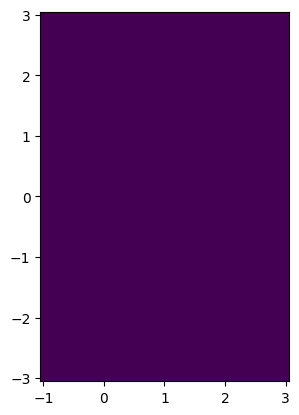

pred after 8 : 1.774458708895119
pred after 16 : 1.3461724120699012
pred after 24 : 1.0007394981608315
pred after 32 : 0.7731728066121971
pred after 40 : 0.6820638299755631
pred after 48 : 0.6441186955370758
pred after 56 : 0.6176773969919124
pred after 64 : 0.5930821225010362


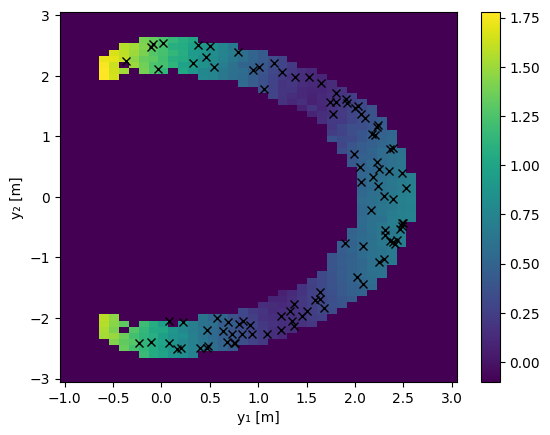

-------------------------


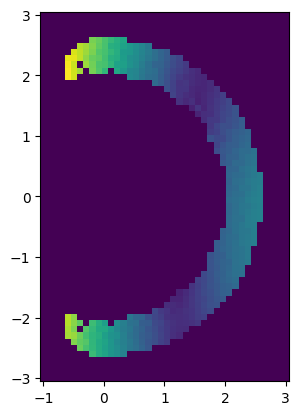

pred after 8 : 0.3699966441425573
pred after 16 : 0.309544007271975
pred after 24 : 0.27844141937167216
pred after 32 : 0.26028680997566184
pred after 40 : 0.24811416053557556
pred after 48 : 0.23864943301257366
pred after 56 : 0.23019348411879617
pred after 64 : 0.22255410158058606


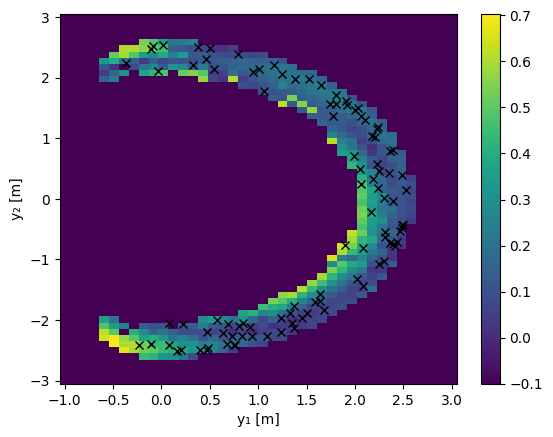

-------------------------


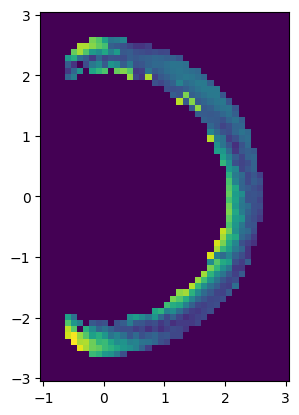

pred after 8 : 0.34281115014442576
pred after 16 : 0.28712892800292356
pred after 24 : 0.2603581331205211
pred after 32 : 0.24570212508250797
pred after 40 : 0.2353774266292107
pred after 48 : 0.22659092718884202
pred after 56 : 0.21874002411759264
pred after 64 : 0.21157644557642977


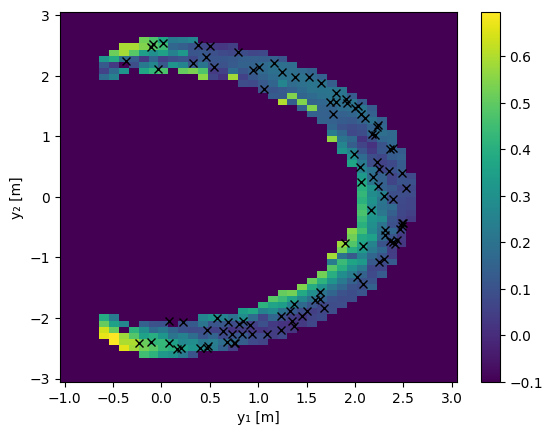

In [8]:
%run reptile-fk-demo.py

## Analysis

- two alternative explanations of why Reptile works

#### 1. Leading Order Expansion of the Update

- Taylor series expansion to approximate the update performed by
  - Reptile and
  - MAML
Result:
- both contain the same leading-order terms
  - 1st term: minimizes expected loss *(joint training)*
  - 2nd term: maximizes within-task generalization

#### 2. Finding a Point Near All Solution Manifolds

## Resources
**[1] A. Nichol, J. Achiam, J. Schulman (2018):** *On First-Order Meta-Learning Algorithms*\
**[2] A. Nichol and J. Schulman (2018):** *Reptile: a Scalable Meta-Learning Algorithm*\
**[3] Wikipedia (accessed July 2022):** *[Meta learning (computer science)](https://en.wikipedia.org/wiki/Meta_learning_(computer_science))*\
**[4] C. Finn, P. Abbeel, S. Levine (2017):** *Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks*\
**[5] R. Salakhutdinov, J. Tenenbaum, A. Torralba (2012):** *One-shot learning with a hierarchi- cal nonparametric bayesian model*\
**[6] WIRED (accessed October 2022):** *[Computer Scientist Explains One Concept in 5 Levels of Difficulty](https://youtu.be/raHM3k-uR0E)*\
**[7] ThinkAutomation (accessed October 2022):** *[What is Moravec’s paradox and what does it mean for modern AI?](https://www.thinkautomation.com/bots-and-ai/what-is-moravecs-paradox-and-what-does-it-mean-for-modern-ai/)*\
**[8] C. Finn, P. Abbeel, S. Levine (2017):** *Model-Agnostic Meta-Learning for Fast Adaptation of Deep Networks*